**Contexto**: clasificación de digitos escritos a mano, las clases son los números del 0 al 9. Usamos la base de datos MNIST. Corresponde a imágenes de en escala de gris de 28 x 28, vienen organizadas en forma de fila, por lo que se requiere redimensionar a una matriz de 28 x 28 para poder visualizar.

https://en.wikipedia.org/wiki/MNIST_database


Se requiere el uso de mlxtend para cargar mnist
```
pip install mlxtend
```

[INFO] 
labels: 
 [0 1 2 3 4 5 6 7 8 9] 
count per class 
 [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]
Training set dimensions: 60000 x 784
Test set dimensions: 10000 x 784
5


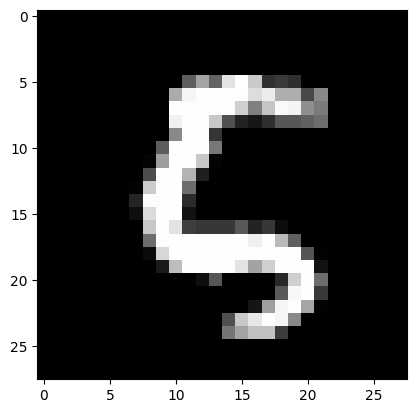

In [1]:
#load data
import numpy as np
import matplotlib.pyplot       as plt
from mlxtend.data import loadlocal_mnist

X_train, y_train = loadlocal_mnist(
        images_path='MNIST/train-images-idx3-ubyte', 
        labels_path='MNIST/train-labels-idx1-ubyte')

X_test, y_test = loadlocal_mnist(
        images_path='MNIST/t10k-images-idx3-ubyte', 
        labels_path='MNIST/t10k-labels-idx1-ubyte')

labels,count_class = np.unique(y_train,return_counts=True)

print('[INFO] \nlabels: \n %s \ncount per class \n %s' % (labels,count_class))
print('Training set dimensions: %s x %s' % (X_train.shape[0],X_train.shape[1]))
print('Test set dimensions: %s x %s' % (X_test.shape[0], X_test.shape[1]))

dim1=28
dim2=28     
image = X_train[2000].reshape((28,28))
print(y_train[2000])
plt.imshow(image,cmap="gray");

En un modelo de Keras para clasificación multiclase, se utiliza una función de pérdida adecuada para este tipo de problema, como `categorical_crossentropy`, que compara las distribuciones de probabilidad predichas con las verdaderas. La cantidad de neuronas en la última capa debe ser igual al número de clases en el problema de clasificación. Las etiquetas de las clases deben estar representadas en el entrenamiento utilizando codificación `one-hot`, donde cada etiqueta es un vector binario con un valor de 1 en la posición correspondiente a la clase y 0 en todas las demás posiciones.

In [3]:
#multilayer feedforward
from keras.models import Sequential
from keras.layers import Dense

In [4]:
num_classes = labels.size
nu_hl1 = 400
nu_hl2 = 200
nu_hl3 = 100
nu_hl4 = num_classes


model = Sequential()
model.add(Dense(nu_hl1, input_dim=dim1*dim2, activation='relu'))
model.add(Dense(nu_hl2, activation='relu'))
model.add(Dense(nu_hl3, activation='relu'))
model.add(Dense(nu_hl4, activation='softmax'))  #sigmoid
model.summary()

c:\Users\4616289\OneDrive - Universidad Icesi\Documentos\code\deeplearning\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 400)            │       314,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 200)            │        80,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 415,310 (1.58 MB)

 Trainable params: 415,310 (1.58 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
from keras.utils import to_categorical
train_labels = to_categorical(y_train, num_classes=num_classes)
test_labels = to_categorical(y_test, num_classes=num_classes)

print('convertir: ',y_train[0],' a one hot encoding : ',train_labels[0])

convertir:  5  a one hot encoding :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [6]:
#'binary_crossentropy'
#'categorical_crossentropy'

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, train_labels, epochs=5, batch_size=10)

Epoch 1/5
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 88s 11ms/step - accuracy: 0.8331 - loss: 2.1310
Epoch 2/5
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 69s 12ms/step - accuracy: 0.9436 - loss: 0.2194
Epoch 3/5
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 73s 12ms/step - accuracy: 0.9569 - loss: 0.1784
Epoch 4/5
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 80s 13ms/step - accuracy: 0.9657 - loss: 0.1467
Epoch 5/5
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 71s 12ms/step - accuracy: 0.9677 - loss: 0.1509


In [7]:
predictions = model.predict(X_test)
predictions[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


array([3.1282393e-18, 4.0670420e-10, 1.1983321e-11, 6.1940403e-10,
       6.5575000e-14, 4.7461008e-14, 0.0000000e+00, 9.9999940e-01,
       1.9729969e-11, 6.4464950e-07], dtype=float32)

En un modelo de Keras para clasificación multiclase, `np.argmax` se utiliza típicamente para determinar la clase predicha a partir de las probabilidades de salida del modelo. Esta función de NumPy encuentra el índice del valor más alto en un array, lo que corresponde a la clase con la mayor probabilidad predicha por el modelo. Por lo tanto, al aplicar `np.argmax` a las salidas del modelo, se obtiene la clase predicha para cada instancia de entrada.

In [8]:
# round predictions 
predictions = model.predict(X_test)
predIdxs = np.argmax(predictions, axis=1)
predIdxs[:10]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9])

In [9]:
print("etiqueta 10 primeras imagenes de prueba:  ",y_test[:10],\
      "\nprediccion 10 primeras imagenes de prueba:",predIdxs[:10])

etiqueta 10 primeras imagenes de prueba:   [7 2 1 0 4 1 4 9 5 9] 
prediccion 10 primeras imagenes de prueba: [7 2 1 0 4 1 4 9 6 9]


In [10]:
_, accuracy = model.evaluate(X_test, test_labels)
print('Accuracy: %.2f' % (accuracy*100))


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9643 - loss: 0.1682
Accuracy: 96.63




10 primeras imagenes de prueba
etiqueta 10 primeras imagenes de prueba:   [7 2 1 0 4 1 4 9 5 9] 
prediccion 10 primeras imagenes de prueba: [7 2 1 0 4 1 4 9 6 9]


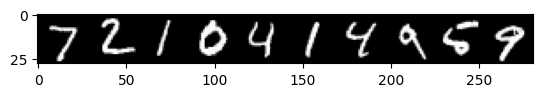

In [11]:
images =  np.zeros((28,1))
for i in range(10):
    image = X_test[i].reshape((28,28))    
    images=np.append(images,image,axis=1)
    
print("\n\n10 primeras imagenes de prueba")    
plt.imshow(images,cmap="gray");

print("etiqueta 10 primeras imagenes de prueba:  ",y_test[:10],\
      "\nprediccion 10 primeras imagenes de prueba:",predIdxs[:10])